In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go

In [8]:
os.getcwd()

'/content'

# New Section

In [9]:
df = pd.read_csv('/content/Mental Health Dataset.csv')

In [4]:
df.head()

,posts,predicted,intensity
0,I know as parent of child with down syndrome t...,negative,-1
1,but in my heart I know this is the future prom...,neutral,0
2,I have mylefibrosis which turn to leukemia the...,negative,-1
3,from one of my health group subject wayne dyer...,neutral,0
4,gmos now link to leukemia http nsnbc I 2013 07...,neutral,0


In [ ]:
df.shape

(10392, 3)

In [ ]:
df.isnull().sum()

posts        1
predicted    0
intensity    0
dtype: int64

In [10]:
df = df.dropna()
df.isnull().sum()

posts        0
predicted    0
intensity    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10391 entries, 0 to 10391
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   posts      10391 non-null  object
 1   predicted  10391 non-null  object
 2   intensity  10391 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 324.7+ KB


In [ ]:
df.nunique()

posts        10391
predicted        4
intensity        4
dtype: int64

In [ ]:
df['predicted'].unique()

array(['negative', 'neutral', 'positive', 'very negative'], dtype=object)

In [ ]:
df['predicted'].value_counts()

predicted
neutral          4374
negative         4112
very negative    1155
positive          750
Name: count, dtype: int64

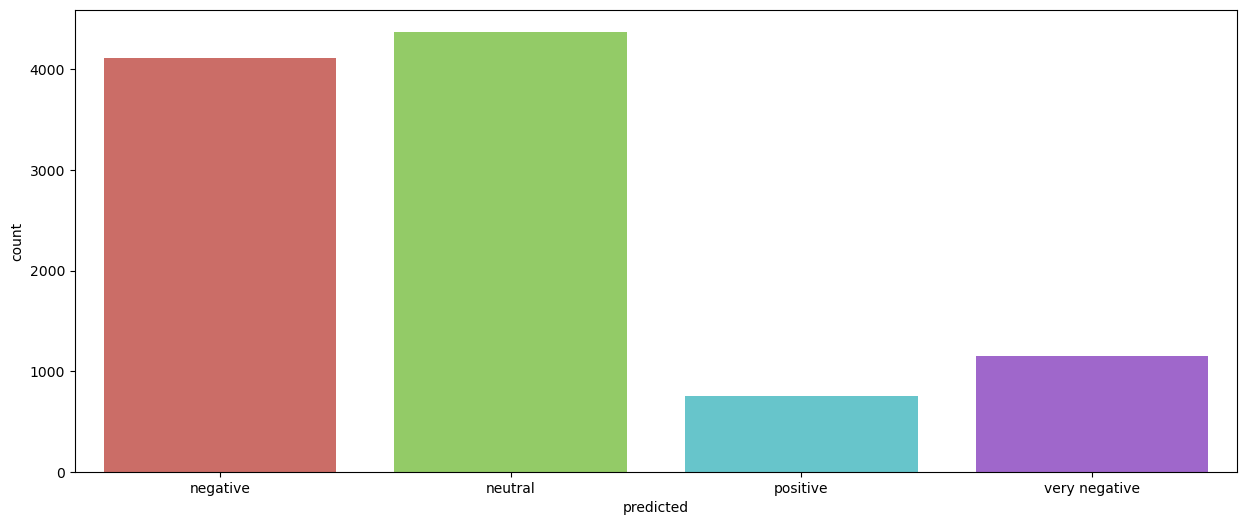

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='predicted', data=df, palette='hls')
plt.show()

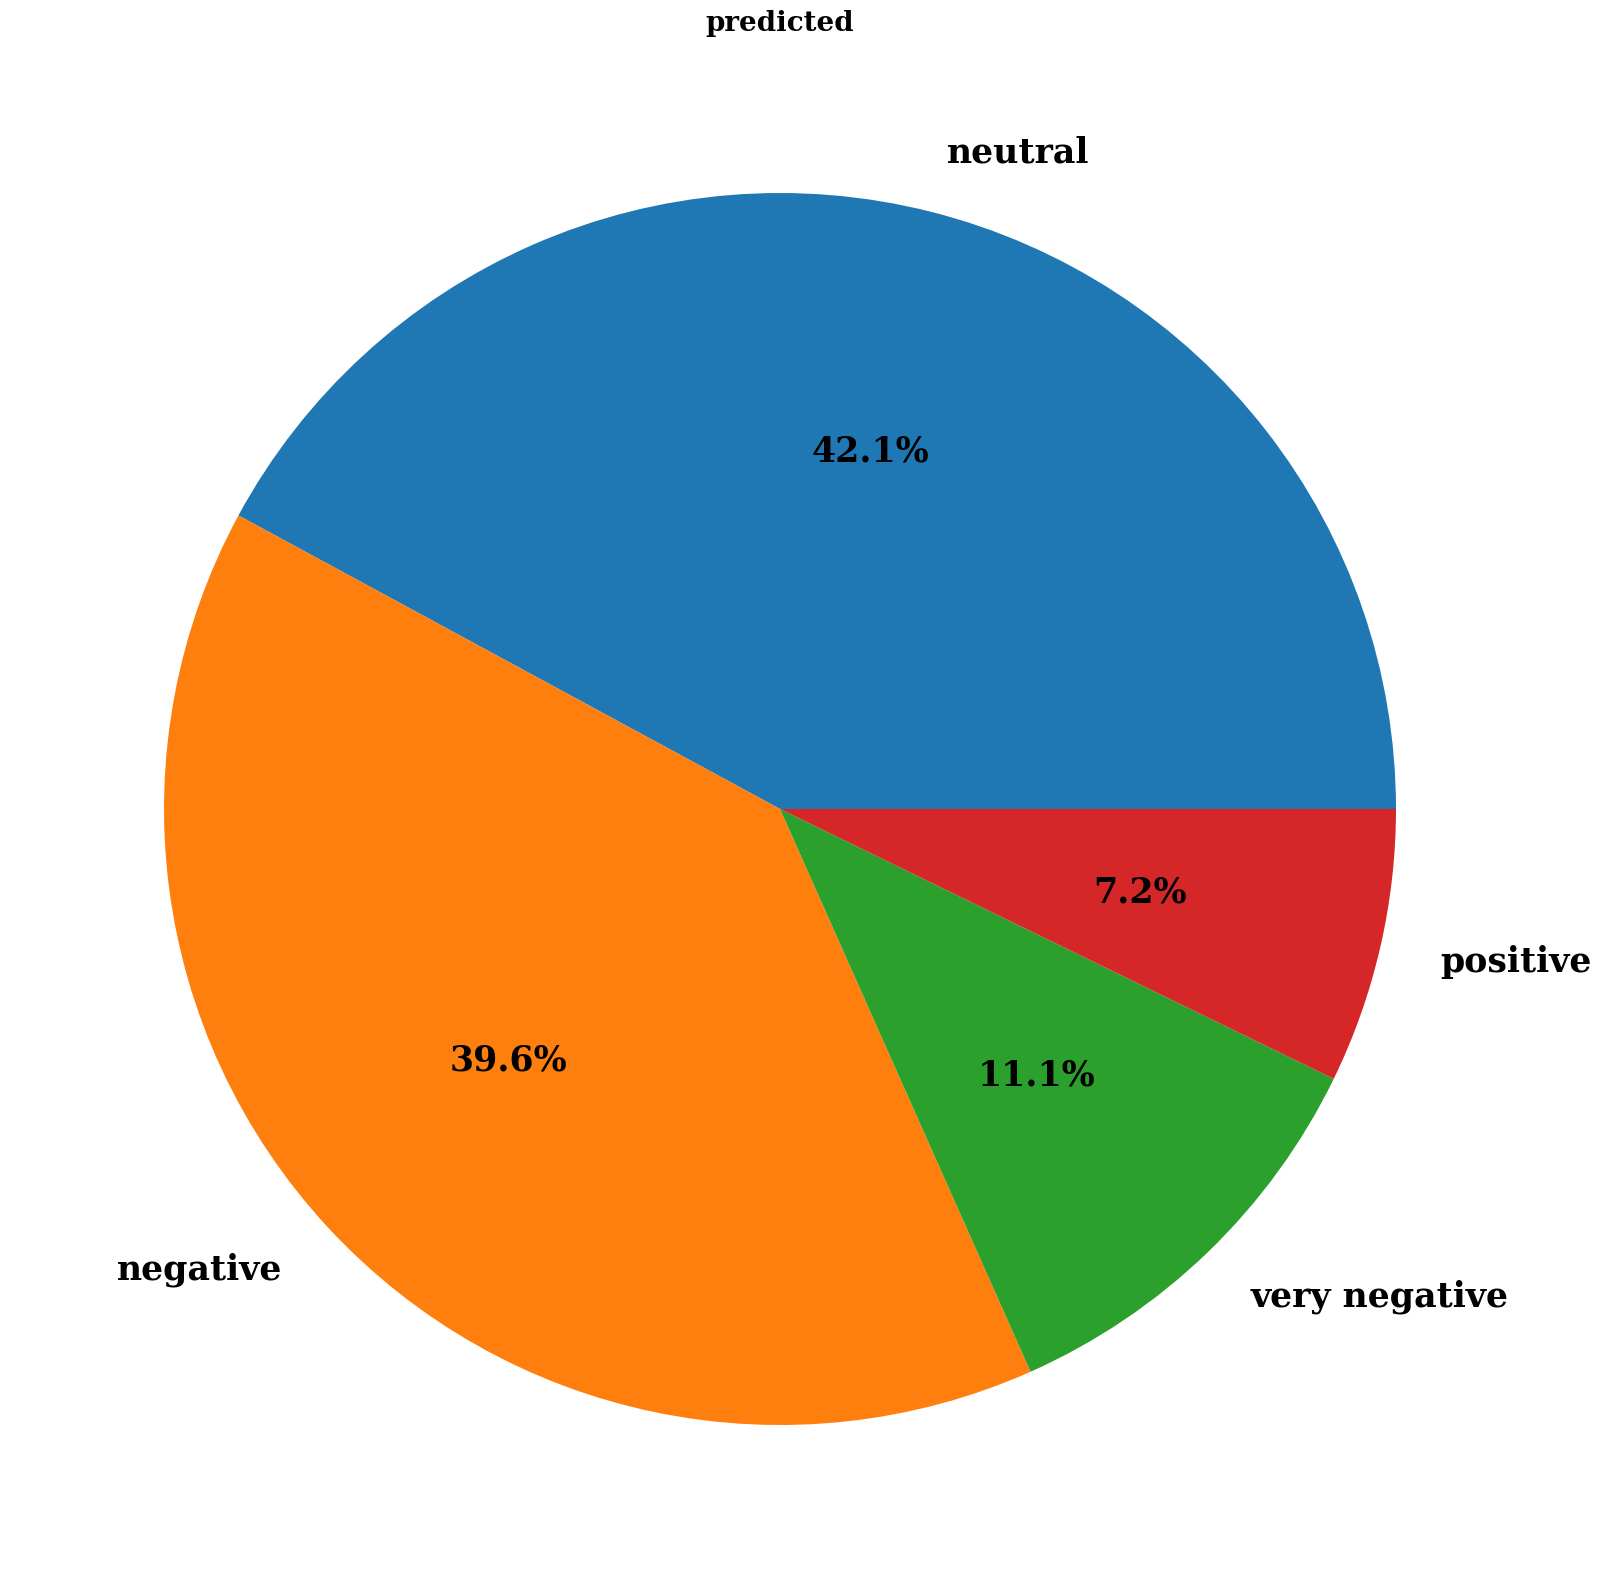

In [ ]:
plt.figure(figsize=(30,20))
plt.pie(df['predicted'].value_counts(), labels=df['predicted'].value_counts().index,
       autopct='%1.1f%%', textprops={'fontsize':25, 'color':'black', 'weight': 'bold',
                                    'family':'serif'})
hfont = {'fontname':'serif','weight':'bold'}
plt.title('predicted', size=20, **hfont)
plt.show()

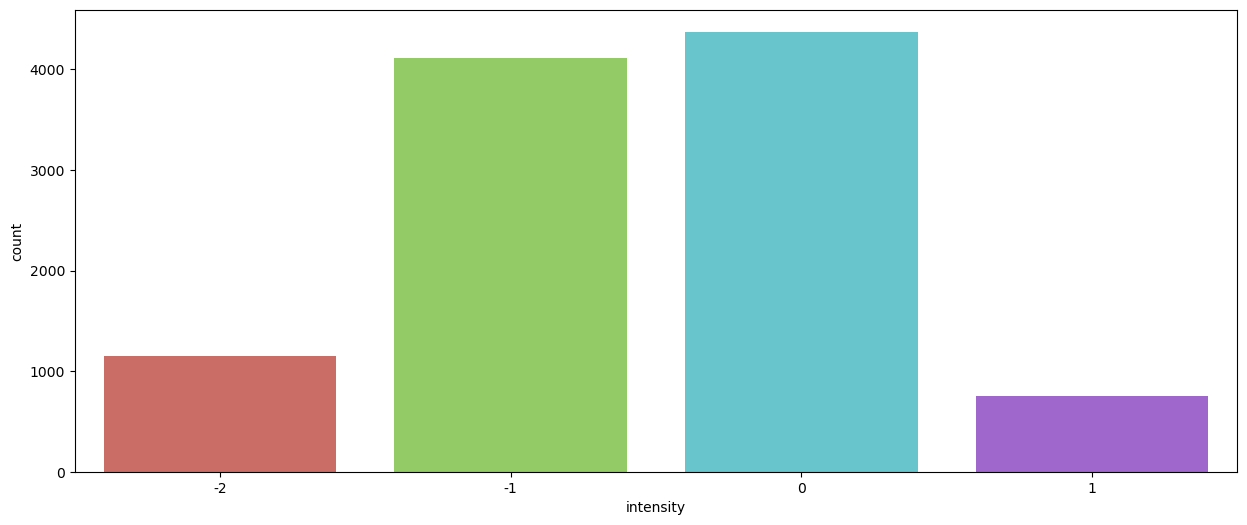

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='intensity', data=df, palette='hls')
plt.show()

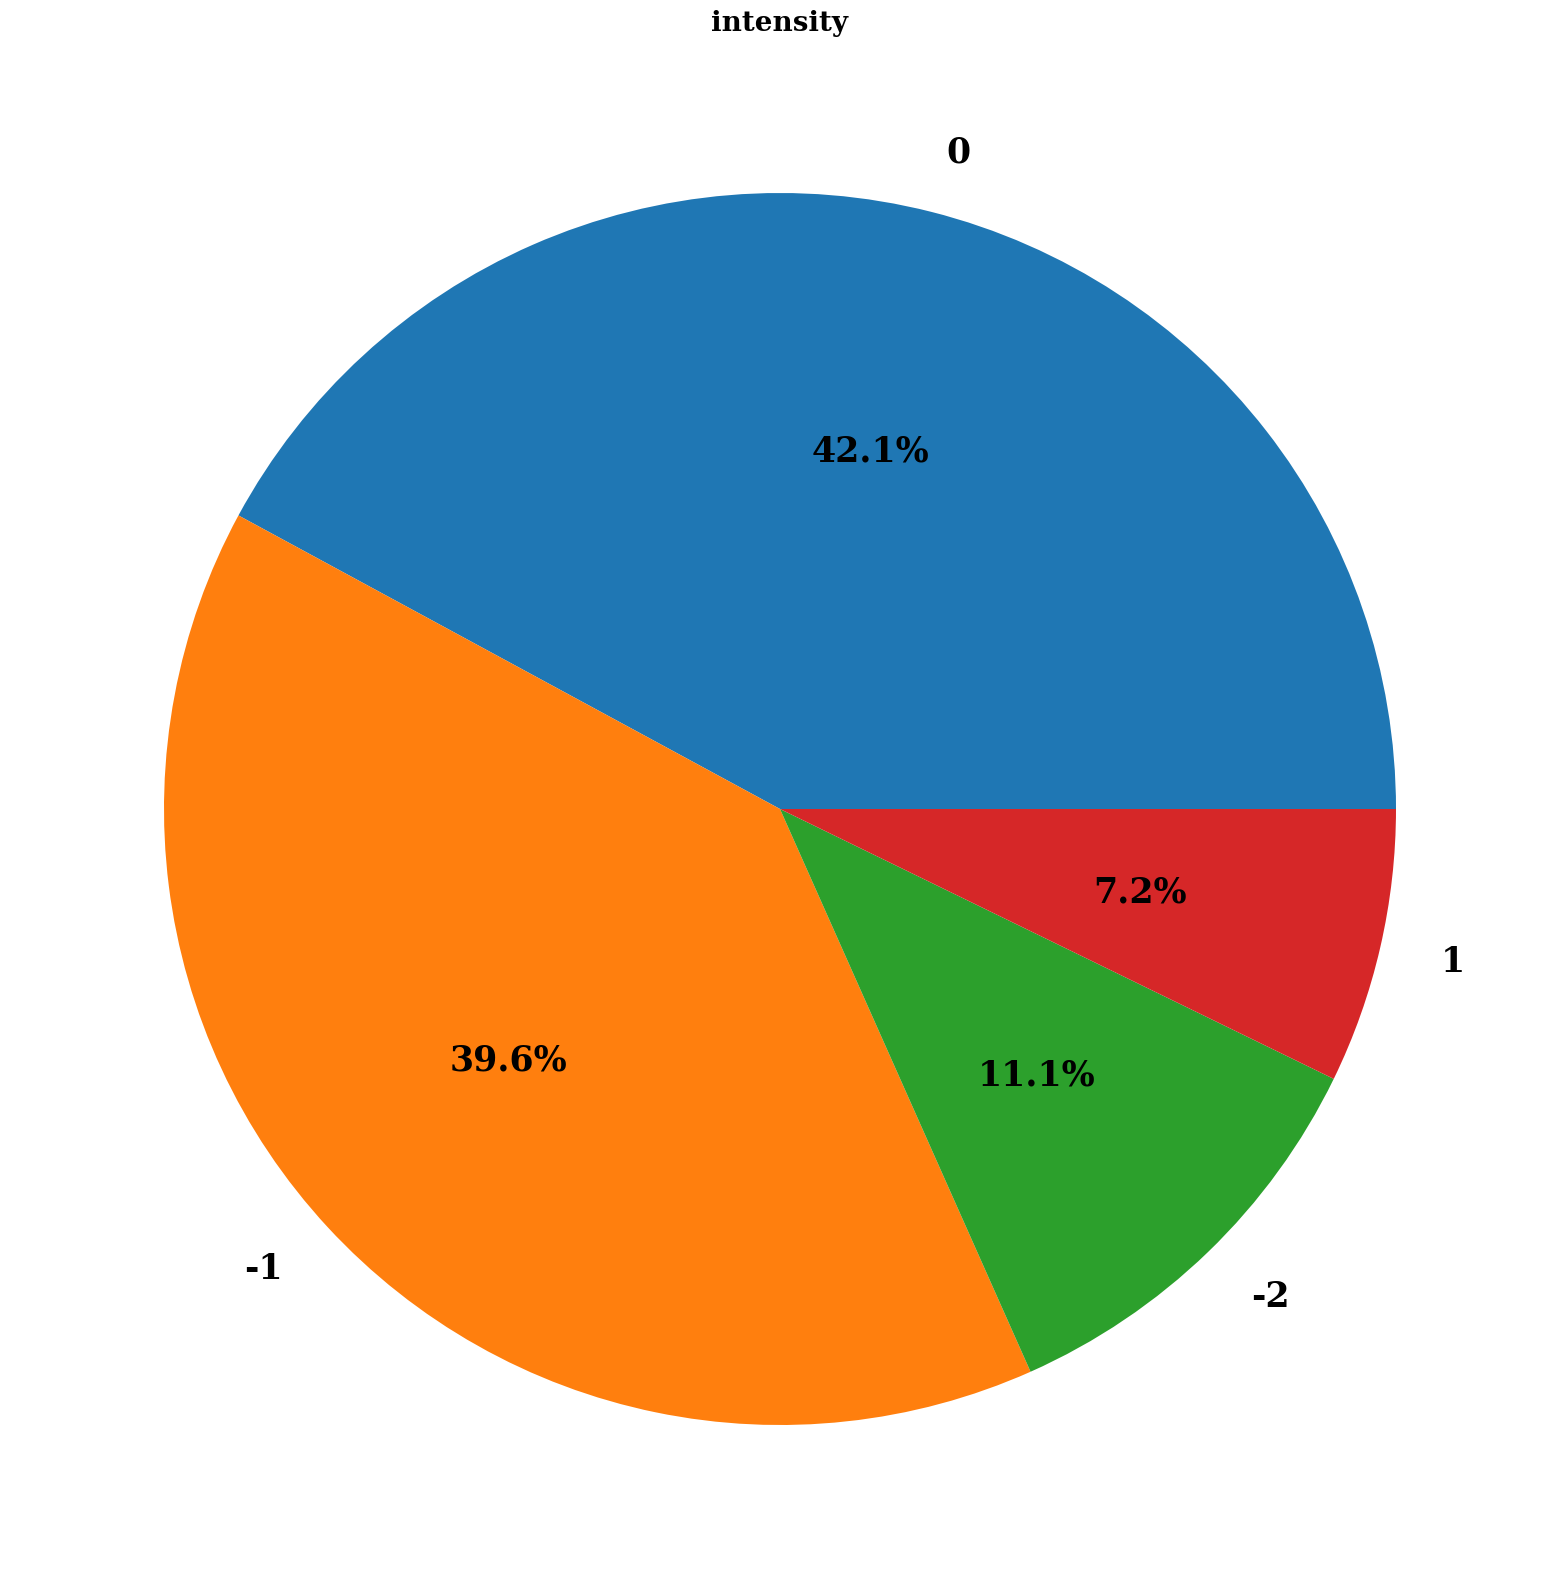

In [ ]:
plt.figure(figsize=(30,20))
plt.pie(df['intensity'].value_counts(), labels=df['intensity'].value_counts().index,
       autopct='%1.1f%%', textprops={'fontsize':25, 'color':'black', 'weight': 'bold',
                                    'family':'serif'})
hfont = {'fontname':'serif','weight':'bold'}
plt.title('intensity', size=20, **hfont)
plt.show()

In [ ]:
df.posts[1]

'but in my heart I know this is the future promise article regardless http ottawa ctvnew can ottawa researcher hopeful nano particle can cure leukemia 1 1409330 ottawa researcher hopeful nano particle can cure leukemia medical breakthrough ctv joanne schnurr on homegrown research that is close to cure leukemia medical leader around the world have their eye on ottawa blood cancer breakthrough ottawa doctor talk cure doctor at the ottawa research institute call it a major finding in the battle against the blood cancer leukemia share 8 text share on print share on email 0 joanne schnurr ctv ottawa publish tuesday august 13 2013 4 05pm edt last update tuesday august 13 2013 6 22pm edt ottawa researcher are cautiously use the word cure when talk about new research into leukemia the research is new and a long way from help human patient but in mouse they ve develop tiny particle that in the lab cause cancerous white blood cell to kill themselves for patient with acute myeloid leukemia stem c

In [ ]:
df.posts

0        I know as parent of child with down syndrome t...
1        but in my heart I know this is the future prom...
2        I have mylefibrosis which turn to leukemia the...
3        from one of my health group subject wayne dyer...
4        gmos now link to leukemia http nsnbc I 2013 07...
                               ...                        
10387    hey everyone I am a 25 year old male I work ou...
10388    have surgery for stage 1 colon cancer 1 year a...
10389    the doctor advise we he could not remove the a...
10390    my 66 year old father have been through so muc...
10391    I have bein have a bloody stool since last yea...
Name: posts, Length: 10391, dtype: object

In [ ]:
# so the machine basically use to understand numbers.... in here every reviews in (posts) are in words so we cant use
#                                                        one hot encoder or label encoder.... so we use somthing called
#                                                        BOW(bag of words) or TF-IDF(term frequency inverse document
#                                                        frequency) these are some advance technique and in both we have
#                                                        somthing called as N-gram and little advance we have (word2vec)

#      image is ideally a pixel value 0 - 255 pixel so
#      we use these algorithm CNN,MlP,CV2
#      Convolutional neural networks, MultiLayer Perceptron
#      Computer vison 2

#      ideally we use CNN on the top of it we use the CV2
#      like that

#                                                        NOTE :- it's a text data not a number so the sequence is matter
#                                                                like for ex:-      we will say
#                                                                              hi my name is Rayvan
#                                                                                        NOT
#                                                                              hi my Rayvan is name
#                                                                So the sequence is matter here a lot keep that is mind

#      The machine can understand the sequence so first
#      convert it into number next to sequence

In [ ]:
review_0 = df['posts'].values[0]
print(review_0)

print("***************"*5)

review_100 = df['posts'].values[100]
print(review_100)

print("***************"*5)

review_5500 = df['posts'].values[5500]
print(review_5500)

print("***************"*5)

review_10000 = df['posts'].values[10000]
print(review_10000)

print("***************"*5)

I know as parent of child with down syndrome that you have all hear that our child are at a high risk of leukemia as parent we read up on it and then say well that will not happen to my child well when will have just turn 2yr old he start bruise the thought of leukemia breafly cross my mind but I quickly push it out of my mind and rationalize it by say that he was a rough playing 2yr old and it was normal to bruise now and then I have just go to work a few month before and will have get a little more fussy and whinny but that is normal to right well then he get sick and like a lot of child with down when he get sick he get sick so we take he to the doc on a friday they say he have a cold and I tell my boss that he was sick and not to be surpise if I call and say he was in the hospital because they offten have to do that when he get sick she say ok and when sit get there sure enough he was much sicker and we take he to the er they tell we he have rsv and send we home with some med by th

In [11]:
df_new = df.copy()

In [ ]:
# Mandatory Preprocessing for any Text data

#                                      Pipeline
#                              * Data Acquisation - big data(data engineer)
#                              * Data Text Preprocessing - clean the data and how we will do it
#                                                  - 1st we have to convert to lowercase
#                                                  - 2nd we have to remove any HTML, HTTP format any emoji
#


In [ ]:
# now changing the uppercase to lowercase

def clean_text(text):
    text = text.lower()
    return text.strip()

In [ ]:
df_new['posts'] = df_new['posts'].apply(lambda x: clean_text(x))

In [ ]:
review1_0 = df_new['posts'].values[0]
print(review1_0)

print("***************"*5)

review1_100 = df_new['posts'].values[100]
print(review1_100)

print("***************"*5)

review1_5500 = df_new['posts'].values[5500]
print(review1_5500)

print("***************"*5)

review1_10000 = df_new['posts'].values[10000]
print(review1_10000)

print("***************"*5)

i know as parent of child with down syndrome that you have all hear that our child are at a high risk of leukemia as parent we read up on it and then say well that will not happen to my child well when will have just turn 2yr old he start bruise the thought of leukemia breafly cross my mind but i quickly push it out of my mind and rationalize it by say that he was a rough playing 2yr old and it was normal to bruise now and then i have just go to work a few month before and will have get a little more fussy and whinny but that is normal to right well then he get sick and like a lot of child with down when he get sick he get sick so we take he to the doc on a friday they say he have a cold and i tell my boss that he was sick and not to be surpise if i call and say he was in the hospital because they offten have to do that when he get sick she say ok and when sit get there sure enough he was much sicker and we take he to the er they tell we he have rsv and send we home with some med by th

In [ ]:
df_new.posts

0        i know as parent of child with down syndrome t...
1        but in my heart i know this is the future prom...
2        i have mylefibrosis which turn to leukemia the...
3        from one of my health group subject wayne dyer...
4        gmos now link to leukemia http nsnbc i 2013 07...
                               ...                        
10387    hey everyone i am a 25 year old male i work ou...
10388    have surgery for stage 1 colon cancer 1 year a...
10389    the doctor advise we he could not remove the a...
10390    my 66 year old father have been through so muc...
10391    i have bein have a bloody stool since last yea...
Name: posts, Length: 10391, dtype: object

In [ ]:
# remove punctuation

import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punctuation(text):
    punctuationfree = "".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [ ]:
df_new['posts'] = df_new['posts'].apply(lambda x: remove_punctuation(x))

In [ ]:
df_new['posts']

0        i know as parent of child with down syndrome t...
1        but in my heart i know this is the future prom...
2        i have mylefibrosis which turn to leukemia the...
3        from one of my health group subject wayne dyer...
4        gmos now link to leukemia http nsnbc i 2013 07...
                               ...                        
10387    hey everyone i am a 25 year old male i work ou...
10388    have surgery for stage 1 colon cancer 1 year a...
10389    the doctor advise we he could not remove the a...
10390    my 66 year old father have been through so muc...
10391    i have bein have a bloody stool since last yea...
Name: posts, Length: 10391, dtype: object

In [ ]:
import re

In [ ]:
def tokenization(text):
    tokens = re.split('w+', text)
    return tokens

In [ ]:
df_new['posts'] = df_new['posts'].apply(lambda x: tokenization(x))

In [ ]:
df_new['posts'] # here they consider eveything as token

0        [i kno,  as parent of child , ith do, n syndro...
1        [but in my heart i kno,  this is the future pr...
2        [i have mylefibrosis , hich turn to leukemia t...
3        [from one of my health group subject , ayne dy...
4        [gmos no,  link to leukemia http nsnbc i 2013 ...
                               ...                        
10387    [hey everyone i am a 25 year old male i , ork ...
10388    [have surgery for stage 1 colon cancer 1 year ...
10389    [the doctor advise , e he could not remove the...
10390    [my 66 year old father have been through so mu...
10391    [i have bein have a bloody stool since last ye...
Name: posts, Length: 10391, dtype: object

In [ ]:
df_new.posts[60]

['finally the us is follo',
 ' canada australia and uk by ban cfs patient from donate blood do this mean ',
 'e ',
 'ill be put in a national database ',
 'ashington post today red cross bar chronic fatigue patient from donate blood by rob stein the american red cross announce friday that it is bar people ',
 'ith chronic fatigue syndrome from donate blood to reduce the risk of transmit a virus that have been associate ',
 'ith the disease the virus is kno',
 ' as xenotropic murine leukemia virus relate virus or xmrv some study have find that people ',
 'ith chronic fatigue syndrome are more likely to carry the virus but it remain far from clear ',
 'hether the virus cause the disease nevertheless the red cross decide to bar people ',
 'ith the syndrome from donate in the interest of patient and donor safety accord to an announcement from the organization a man give blood for the red cross james a parcell for the ',
 'ashington post at present there are no specific federal recommendati

In [ ]:
# there are lot of stop word (connecting word) like i a my an etc.... so we don't want to create many tokens for each

In [ ]:
# !pip install --user -U nltk

In [12]:
import nltk
from wordcloud import WordCloud # which word comes frequently then the image will be bigger

In [8]:
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# corpus - if we consolidate all 10391 that is my corpus (consolidated all my documents consider one)
# document - how many review there (so in this dataset there are 10391)
# vocabulary - how many unique words are there
# word - how many words are there in each paragraph

In [13]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
# stopwords = nltk.corpus.stopwords.words('hinglish')
# stopwords

In [ ]:
# stopwords = nltk.corpus.stopwords.words('french')
# stopwords

In [ ]:
def remove_stopwords(text):
    output = " ".join(word for word in text.split() if word.lower() not in stopwords)
    return output

In [ ]:
df_new['posts'] = df_new['posts'].apply(lambda x: remove_stopwords(x))

In [ ]:
df_new['posts'] # all stopwords are removed

0        know parent child syndrome hear child high ris...
1        heart know future promise article regardless h...
2        mylefibrosis turn leukemia want stem cell tran...
3        one health group subject wayne dyer leukemia c...
4        gmos link leukemia http nsnbc 2013 07 17 gmo l...
                               ...                        
10387    hey everyone 25 year old male work eat pretty ...
10388    surgery stage 1 colon cancer 1 year ago cea le...
10389    doctor advise could remove abnormal polyp chri...
10390    66 year old father much past year really need ...
10391    bein bloody stool since last year start around...
Name: posts, Length: 10391, dtype: object

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer() # nothing but for ex : if there is a word running, runs (we can make it run only)

In [ ]:
def lemmatizer(text):
    lemm_text = " ".join([wordnet_lemmatizer.lemmatize(word) for word in text.split()])
    return lemm_text

In [ ]:
df_new['posts'] = df_new['posts'].apply(lambda x: lemmatizer(x))

In [ ]:
def remove_digits(text):
    class_text = re.sub('[^a-z]+',' ', text)
    return class_text

In [ ]:
df_new['posts'] = df_new['posts'].apply(lambda x: remove_digits(x))

In [ ]:
df_new['posts']

0        know parent child syndrome hear child high ris...
1        heart know future promise article regardless h...
2        mylefibrosis turn leukemia want stem cell tran...
3        one health group subject wayne dyer leukemia c...
4        gmos link leukemia http nsnbc gmo link leukemi...
                               ...                        
10387    hey everyone year old male work eat pretty hea...
10388    surgery stage colon cancer year ago cea level ...
10389    doctor advise could remove abnormal polyp chri...
10390     year old father much past year really need tr...
10391    bein bloody stool since last year start around...
Name: posts, Length: 10391, dtype: object

In [ ]:
df_new

,posts,predicted,intensity
0,know parent child syndrome hear child high ris...,negative,-1
1,heart know future promise article regardless h...,neutral,0
2,mylefibrosis turn leukemia want stem cell tran...,negative,-1
3,one health group subject wayne dyer leukemia c...,neutral,0
4,gmos link leukemia http nsnbc gmo link leukemi...,neutral,0
...,...,...,...
10387,hey everyone year old male work eat pretty hea...,negative,-1
10388,surgery stage colon cancer year ago cea level ...,very negative,-2
10389,doctor advise could remove abnormal polyp chri...,neutral,0
10390,year old father much past year really need tr...,neutral,0


In [14]:
df1 = df_new[['predicted','posts']]
df1.head()

,predicted,posts
0,negative,I know as parent of child with down syndrome t...
1,neutral,but in my heart I know this is the future prom...
2,negative,I have mylefibrosis which turn to leukemia the...
3,neutral,from one of my health group subject wayne dyer...
4,neutral,gmos now link to leukemia http nsnbc I 2013 07...


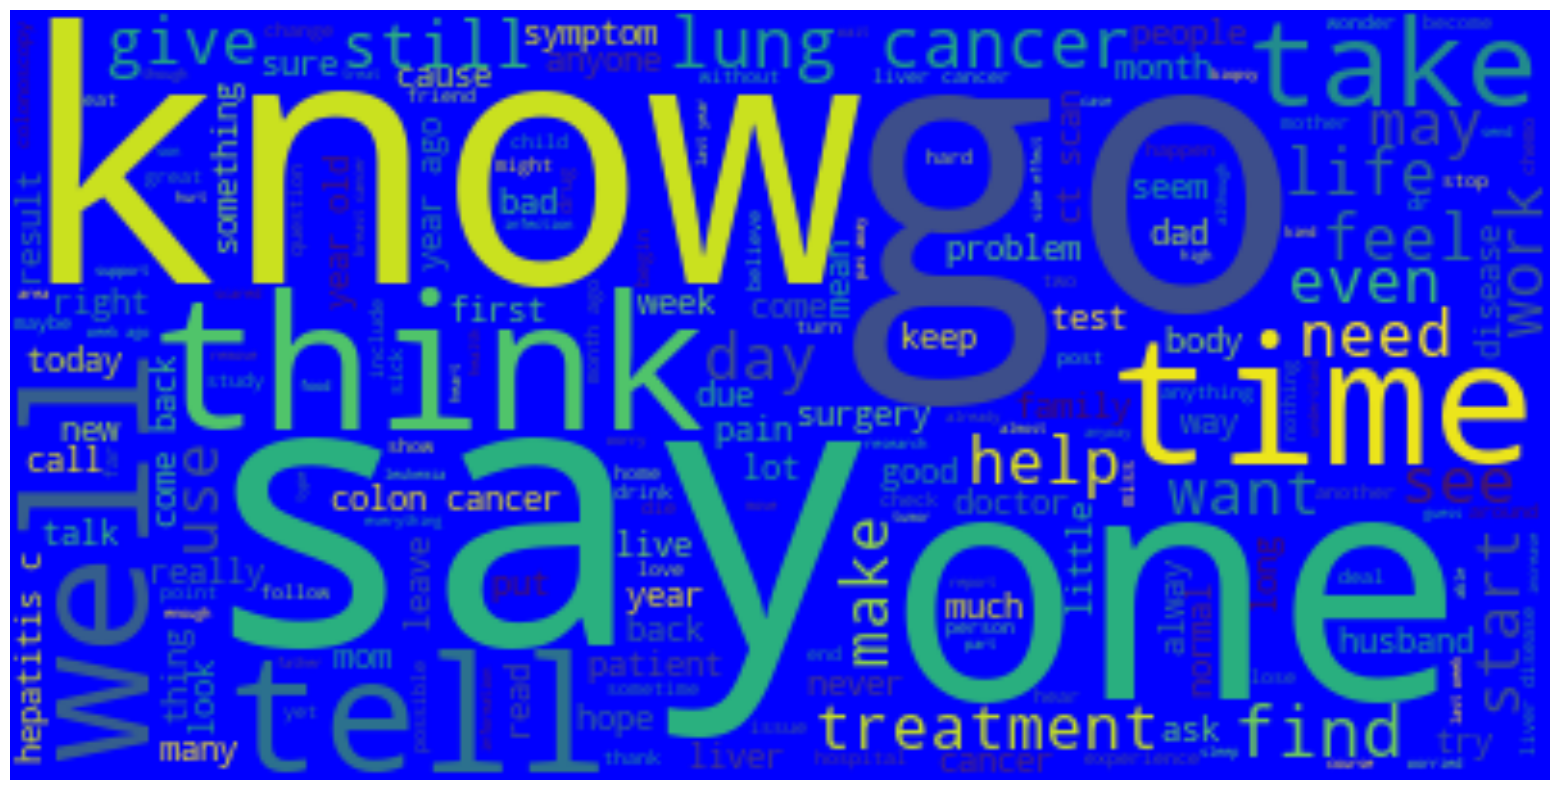

In [ ]:
text_data = ' '.join(df1['posts'])
wordcloud = WordCloud(background_color ='blue').generate(text_data)
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
plt.show()

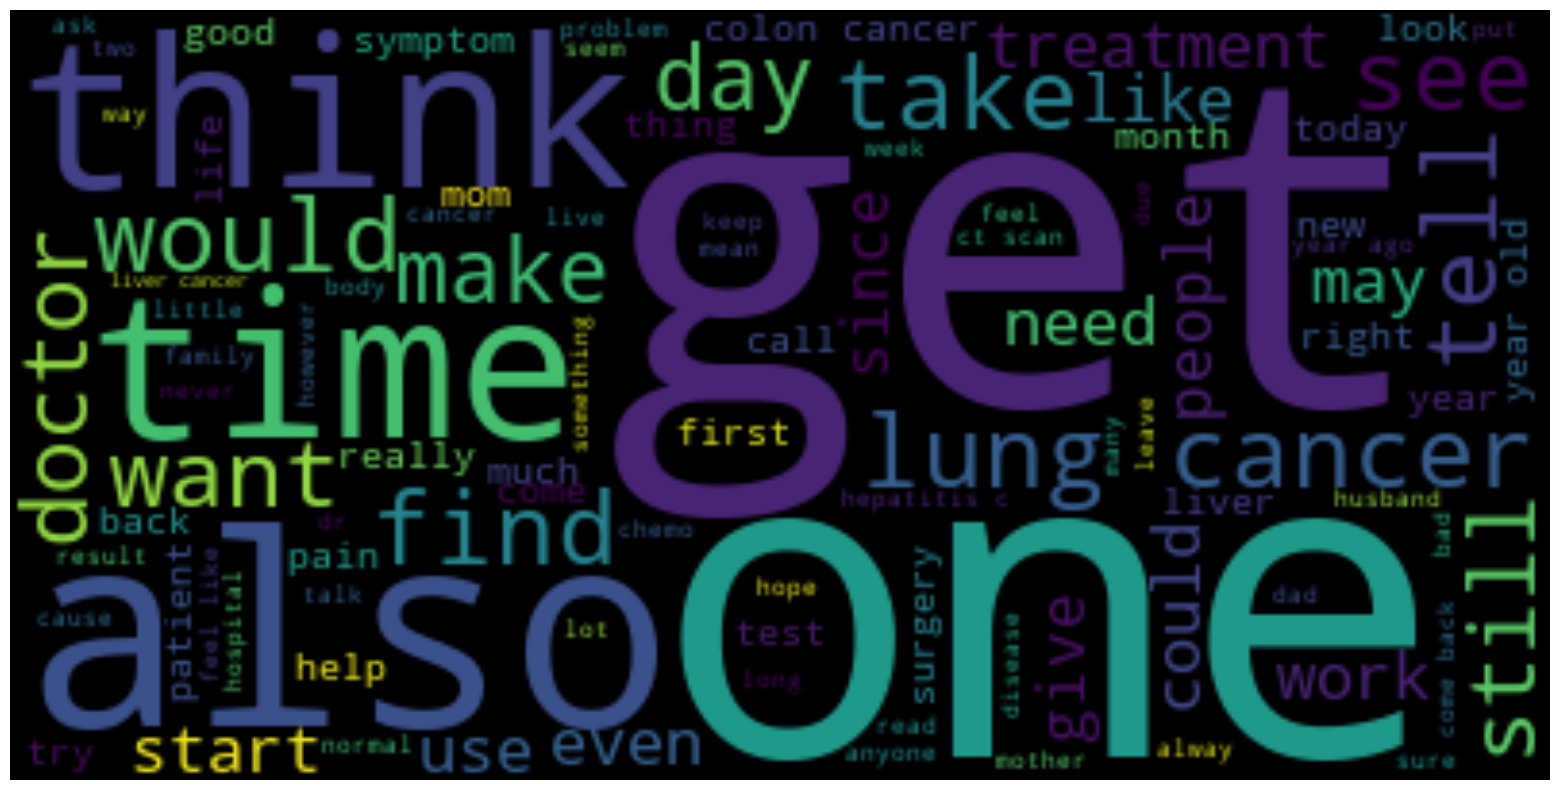

In [ ]:
wcloud = WordCloud(max_words=100,background_color='black', stopwords = ['go','say','know','well']).generate(text_data)
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wcloud, interpolation='bilinear')
ax.axis('off')
plt.show()

In [15]:
df1.head()

,predicted,posts
0,negative,I know as parent of child with down syndrome t...
1,neutral,but in my heart I know this is the future prom...
2,negative,I have mylefibrosis which turn to leukemia the...
3,neutral,from one of my health group subject wayne dyer...
4,neutral,gmos now link to leukemia http nsnbc I 2013 07...


In [ ]:
# Please remember these below steps to handle unstructure data (text data)


# machaine can easily handle image data because they take image as pixel value where as for text data - we need to do NLP

In [ ]:
# NLP - Ml (use bag of words, TF-IDF, N-Gram) -these are feature engineering, on the top of it we can build ML model
# NLP - DL (word2vec, Glove) -text to vector

In [16]:
!pip install contractions

In [17]:
from tqdm import tqdm # it combains everything and it create heatmap
import contractions # if we have words like (I don't know) it will change to (I do not know), (i'm) - (i am)
from bs4 import BeautifulSoup # it can handle HTML,HTTP,www.   these kinda format
from nltk.stem import WordNetLemmatizer # if there are some word like(runs, ran, running) same meaning change to (run)
import re
import nltk
wordnet = WordNetLemmatizer()
nltk.download('stopwords')
nltk.download('wordnet')
stopwords = nltk.corpus.stopwords.words('english')

preprocessed_reviews = []

for sentence in tqdm(df1['posts'].values):
  sentence = contractions.fix(sentence)
  sentence = BeautifulSoup(sentence, 'lxml').get_text()
  sentence = re.sub(r"https\S+","", sentence)
  sentence = re.sub("\S*\d\S*","", sentence).strip()
  sentence = re.sub('[^a-zA-Z\s]+'," ", sentence)
  tokens = sentence.split()
  tokens = [wordnet.lemmatize(word) for word in tokens if word.lower() not in stopwords]
  cleaned_sentence = ' '.join(tokens).lower()
  preprocessed_reviews.append(cleaned_sentence.strip())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
100%|██████████| 10391/10391 [00:14<00:00, 703.83it/s]


In [18]:
preprocessed_reviews

['know parent child syndrome hear child high risk leukemia parent read say well happen child well turn old start bruise thought leukemia breafly cross mind quickly push mind rationalize say rough playing old normal bruise go work month get little fussy whinny normal right well get sick like lot child get sick get sick take doc friday say cold tell bos sick surpise call say hospital offten get sick say ok sit get sure enough much sicker take er tell rsv send home med time get home much bad take back time order test put hospital world start come around first say blood work come back bad want retest probley nothing come back say want move icu keep well start get scared thought come back leukemia put try push mind one want think bad well long doc come say believe william leukemia quickly fly beaumont tx houston tx texas childrens hospital really well remision still yr chemo run around walk anymore due one chemos vinchristin come back find way get around nothing go slow dow write say please

In [19]:
len(preprocessed_reviews)

10391

# Feature Engineering / Extraction method - convert Text to Vector

# TF-IDF

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

In [22]:
tf_idf_vect = TfidfVectorizer(max_features=1000)
tf_idf_vect.fit(preprocessed_reviews)
print('feature names :', tf_idf_vect.get_feature_names_out()[5000:5050])
final_counts_tfidf = tf_idf_vect.transform(preprocessed_reviews)
print("Count vectorizer :", type(final_counts_tfidf))

feature names : []
Count vectorizer : <class 'scipy.sparse._csr.csr_matrix'>


In [23]:
final_counts_tfidf.shape

(10391, 1000)

In [24]:
final_counts_tfidf = tf_idf_vect.transform(preprocessed_reviews).toarray()

In [25]:
pd.DataFrame(final_counts_tfidf).head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.064211
1,0.0,0.0,0.0,0.032193,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.017437,0.0,0.0,0.0,0.033674,0.0,0.000000
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.054042,0.0,0.0,0.0,0.000000,0.0,0.000000
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.073804,0.0,0.0,0.035826,0.0,0.0,0.0,0.000000,0.0,0.000000
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000


In [26]:
df1.head()

,predicted,posts
0,negative,I know as parent of child with down syndrome t...
1,neutral,but in my heart I know this is the future prom...
2,negative,I have mylefibrosis which turn to leukemia the...
3,neutral,from one of my health group subject wayne dyer...
4,neutral,gmos now link to leukemia http nsnbc I 2013 07...


In [27]:
y = df1['predicted']
x = final_counts_tfidf

In [28]:
y.value_counts()

predicted
neutral          4374
negative         4112
very negative    1155
positive          750
Name: count, dtype: int64

In [29]:
from sklearn.preprocessing  import LabelEncoder
label = LabelEncoder()
y_label = label.fit_transform(y)
y_label

array([0, 1, 0, ..., 1, 1, 0])

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_label, test_size=0.2, random_state=42, stratify=y)

In [32]:
from xgboost import XGBClassifier
xgboost = XGBClassifier()
xgboost.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [33]:
y_pred_train = xgboost.predict(x_train)
y_pred_test = xgboost.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score, classification_report

In [36]:
print('Train Accuracy :', accuracy_score(y_train, y_pred_train))
print("****************************************************")
print('Test Accuracy :', accuracy_score(y_test, y_pred_test))

Train Accuracy : 0.980269489894129
****************************************************
Test Accuracy : 0.7085137085137085
